<a href="https://www.kaggle.com/code/tgomesjuliana/crossfit-competitions-feature-engineering?scriptVersionId=137188395" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Definitions

In [2]:
years = [2021, 2022, 2023]
final_competiton = 'games'
qualifying_competitions = ['open', 'quarterfinals', 'semifinals']

# Feature Engineering

## Athletes Information

In [3]:
# Read the CSV file into a DataFrame
information_data = pd.read_csv("../input/crossfit-competitions/consolidated_athletes_information.csv")

# Drop unnecessary columns from the DataFrame
information_data = information_data.drop(columns=['competitorName', 'firstName', 'lastName', 'affiliateName', 'height', 'weight'])

# Calculate BMI using weight (in kg) and height (in meters)
information_data['bmi'] = information_data['weight_kg'] / ((information_data['height_cm'] / 100) ** 2)

# Output the resulting DataFrame
information_data

,competitorId,gender,countryOfOriginName,regionName,affiliateId,age,overallRank,overallScore,year,competition,height_cm,weight_kg,bmi
0,469656.0,M,Canada,North America,18059.0,27.0,1.0,101.0,2021,open,176.0,90.0,29.054752
1,34796.0,M,United States,North America,7991.0,33.0,2.0,141.0,2021,open,176.0,85.0,27.440599
2,105875.0,M,United States,North America,9155.0,34.0,3.0,165.0,2021,open,186.0,93.0,26.881720
3,310970.0,M,United States,North America,22505.0,25.0,4.0,217.0,2021,open,176.0,82.0,26.472107
4,11435.0,M,United States,North America,3220.0,33.0,5.0,254.0,2021,open,176.0,88.0,28.409091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399337,872275.0,F,United States,North America,3617.0,23.0,NaN,0.0,2023,games,161.0,66.0,25.461981
399338,174547.0,F,United States,North America,14583.0,31.0,NaN,0.0,2023,games,171.0,73.0,24.964946
399339,121033.0,F,United States,North America,19593.0,28.0,NaN,0.0,2023,games,168.0,69.0,24.447279
399340,503582.0,F,United States,North America,25335.0,24.0,NaN,0.0,2023,games,166.0,71.0,25.765713


### Pivot competitions' rank and score

In [4]:
# Create an empty DataFrame to accumulate the selected columns
pivot_data = pd.DataFrame()

for year in years:
    # Filter rows with 'games' competition and the current year
    filtered_df = information_data[(information_data['competition'] == final_competiton) & (information_data['year'] == year)].copy()

    # Get unique competitorIds for the current year
    unique_ids = filtered_df['competitorId'].unique()

    # Create a DataFrame to accumulate the selected columns for the current year
    pivot_data_current_year = filtered_df.copy()

    for competition in qualifying_competitions:
        # Filter rows with selected competitorIds, specific competition, and the current year
        result_df = information_data[(information_data['competitorId'].isin(unique_ids)) & (information_data['competition'] == competition) & (information_data['year'] == year)].copy()

        # Select relevant columns and rename them based on the competition
        selected_columns = result_df[['competitorId', 'overallRank', 'overallScore']].copy()
        selected_columns.rename(columns={'overallRank': f'{competition}_rank', 'overallScore': f'{competition}_score'}, inplace=True)

        # Merge the selected columns with the accumulated DataFrame based on 'competitorId' and 'year'
        pivot_data_current_year = pd.merge(pivot_data_current_year, selected_columns, on=['competitorId'], how='left')

    # Sort by 'rank_semifinals' and drop duplicates based on 'competitorId'
    pivot_data_current_year = pivot_data_current_year.sort_values('semifinals_rank').drop_duplicates('competitorId', keep='first')

    # Sort the final DataFrame for the current year by 'gender' and 'overallRank'
    pivot_data_current_year = pivot_data_current_year.sort_values(by=['gender', 'overallRank'])

    # Append the current year's DataFrame to the pivot_data DataFrame
    pivot_data = pd.concat([pivot_data, pivot_data_current_year], ignore_index=True)

# Drop competition column which is now redundant
pivot_data = pivot_data.drop(columns=['competition'])
    
# Output the resulting DataFrame
pivot_data

,competitorId,gender,countryOfOriginName,regionName,affiliateId,age,overallRank,overallScore,year,height_cm,weight_kg,bmi,open_rank,open_score,quarterfinals_rank,quarterfinals_score,semifinals_rank,semifinals_score
0,163097.0,F,Australia,Oceania,19593.0,27.0,1.0,1435.0,2021,163.0,58.0,21.829952,1.0,26.0,1.0,100.0,1.0,588.0
1,591912.0,F,Hungary,Europe,22540.0,24.0,2.0,1179.0,2021,170.0,70.0,24.221453,52.0,845.0,3.0,185.0,2.0,544.0
2,18588.0,F,Iceland,Europe,2025.0,31.0,3.0,1099.0,2021,170.0,69.0,23.875433,118.0,1501.0,39.0,766.0,3.0,528.0
3,120480.0,F,Norway,Europe,372.0,35.0,4.0,1064.0,2021,162.0,59.0,22.481329,17.0,414.0,10.0,241.0,1.0,572.0
4,671666.0,F,United States,North America,3220.0,20.0,5.0,995.0,2021,171.0,64.0,21.887076,10.0,307.0,56.0,963.0,2.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,665223.0,M,Poland,Europe,29893.0,30.0,NaN,0.0,2023,184.0,98.0,28.946125,NaN,NaN,NaN,NaN,10.0,426.0
236,867741.0,M,Canada,North America,21726.0,21.0,NaN,0.0,2023,186.0,96.0,27.748873,30.0,1301.0,17.0,415.0,10.0,477.0
237,900251.0,M,United States,North America,1893.0,21.0,NaN,0.0,2023,188.0,96.0,27.161612,168.0,3299.0,31.0,514.0,11.0,460.0
238,1657300.0,M,Spain,Europe,17272.0,27.0,NaN,0.0,2023,178.0,90.0,28.405504,70.0,2149.0,7.0,230.0,11.0,420.0


### Transform categorical variables into numeric variables

In [5]:
# Create an empty dictionary to store the mapping dictionaries for each column
mapping_dictionaries = {}

# Iterate over columns with object dtype in pivot_data
for colname in pivot_data.select_dtypes("object"):
    # Get the unique values in the column, convert them to strings, and sort them
    unique_sorted = sorted(pivot_data[colname].astype(str).unique())
    # Create a mapping dictionary where each unique value is mapped to its corresponding index
    mapping_dictionaries[colname] = {value: i for i, value in enumerate(unique_sorted)}
    
# Output the resulting dictionaries
mapping_dictionaries

{'gender': {'F': 0, 'M': 1},
 'countryOfOriginName': {'Argentina': 0,
  'Australia': 1,
  'Belgium': 2,
  'Brazil': 3,
  'Canada': 4,
  'Denmark': 5,
  'Finland': 6,
  'France': 7,
  'Germany': 8,
  'Greece': 9,
  'Hungary': 10,
  'Iceland': 11,
  'Iran': 12,
  'Ireland': 13,
  'Italy': 14,
  'Korea, Republic of': 15,
  'Latvia': 16,
  'New Zealand': 17,
  'Norway': 18,
  'Poland': 19,
  'Serbia': 20,
  'Slovakia': 21,
  'South Africa': 22,
  'Spain': 23,
  'Sweden': 24,
  'Switzerland': 25,
  'Turkey': 26,
  'United Arab Emirates': 27,
  'United Kingdom': 28,
  'United States': 29,
  'nan': 30},
 'regionName': {'Africa': 0,
  'Asia': 1,
  'Europe': 2,
  'North America': 3,
  'Oceania': 4,
  'South America': 5}}

In [6]:
# Iterate over each column and its corresponding mapping dictionary
for colname, mapping_dict in mapping_dictionaries.items():
    # Replace the values in the column with the new integer mappings
    pivot_data[colname] = pivot_data[colname].map(mapping_dict)

# Output the resulting DataFrame with updated values
pivot_data

,competitorId,gender,countryOfOriginName,regionName,affiliateId,age,overallRank,overallScore,year,height_cm,weight_kg,bmi,open_rank,open_score,quarterfinals_rank,quarterfinals_score,semifinals_rank,semifinals_score
0,163097.0,0,1.0,4,19593.0,27.0,1.0,1435.0,2021,163.0,58.0,21.829952,1.0,26.0,1.0,100.0,1.0,588.0
1,591912.0,0,10.0,2,22540.0,24.0,2.0,1179.0,2021,170.0,70.0,24.221453,52.0,845.0,3.0,185.0,2.0,544.0
2,18588.0,0,11.0,2,2025.0,31.0,3.0,1099.0,2021,170.0,69.0,23.875433,118.0,1501.0,39.0,766.0,3.0,528.0
3,120480.0,0,18.0,2,372.0,35.0,4.0,1064.0,2021,162.0,59.0,22.481329,17.0,414.0,10.0,241.0,1.0,572.0
4,671666.0,0,29.0,3,3220.0,20.0,5.0,995.0,2021,171.0,64.0,21.887076,10.0,307.0,56.0,963.0,2.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,665223.0,1,19.0,2,29893.0,30.0,NaN,0.0,2023,184.0,98.0,28.946125,NaN,NaN,NaN,NaN,10.0,426.0
236,867741.0,1,4.0,3,21726.0,21.0,NaN,0.0,2023,186.0,96.0,27.748873,30.0,1301.0,17.0,415.0,10.0,477.0
237,900251.0,1,29.0,3,1893.0,21.0,NaN,0.0,2023,188.0,96.0,27.161612,168.0,3299.0,31.0,514.0,11.0,460.0
238,1657300.0,1,23.0,2,17272.0,27.0,NaN,0.0,2023,178.0,90.0,28.405504,70.0,2149.0,7.0,230.0,11.0,420.0


### Fill null values

In [7]:
# Fill null values in 'countryOfOriginName' column with 30
pivot_data['countryOfOriginName'].fillna(30, inplace=True)

# Fill null values in 'affiliateId' column with 0
pivot_data['affiliateId'].fillna(0, inplace=True)

# Fill null values in 'open_score' column with 0
pivot_data['open_score'].fillna(0, inplace=True)

# Fill null values in 'open_rank' column with the maximum value in the column
pivot_data['open_rank'].fillna(pivot_data['open_rank'].max(), inplace=True)

# Fill null values in 'quarterfinals_score' column with 0
pivot_data['quarterfinals_score'].fillna(0, inplace=True)

# Fill null values in 'quarterfinals_rank' column with the maximum value in the column
pivot_data['quarterfinals_rank'].fillna(pivot_data['quarterfinals_rank'].max(), inplace=True)

# Fill null values in 'semifinals_score' column with 0
pivot_data['semifinals_score'].fillna(0, inplace=True)

# Fill null values in 'semifinals_rank' column with the maximum value in the column
pivot_data['semifinals_rank'].fillna(pivot_data['semifinals_rank'].max(), inplace=True)

# Output the resulting DataFrame with updated values
pivot_data

,competitorId,gender,countryOfOriginName,regionName,affiliateId,age,overallRank,overallScore,year,height_cm,weight_kg,bmi,open_rank,open_score,quarterfinals_rank,quarterfinals_score,semifinals_rank,semifinals_score
0,163097.0,0,1.0,4,19593.0,27.0,1.0,1435.0,2021,163.0,58.0,21.829952,1.0,26.0,1.0,100.0,1.0,588.0
1,591912.0,0,10.0,2,22540.0,24.0,2.0,1179.0,2021,170.0,70.0,24.221453,52.0,845.0,3.0,185.0,2.0,544.0
2,18588.0,0,11.0,2,2025.0,31.0,3.0,1099.0,2021,170.0,69.0,23.875433,118.0,1501.0,39.0,766.0,3.0,528.0
3,120480.0,0,18.0,2,372.0,35.0,4.0,1064.0,2021,162.0,59.0,22.481329,17.0,414.0,10.0,241.0,1.0,572.0
4,671666.0,0,29.0,3,3220.0,20.0,5.0,995.0,2021,171.0,64.0,21.887076,10.0,307.0,56.0,963.0,2.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,665223.0,1,19.0,2,29893.0,30.0,NaN,0.0,2023,184.0,98.0,28.946125,992.0,0.0,653.0,0.0,10.0,426.0
236,867741.0,1,4.0,3,21726.0,21.0,NaN,0.0,2023,186.0,96.0,27.748873,30.0,1301.0,17.0,415.0,10.0,477.0
237,900251.0,1,29.0,3,1893.0,21.0,NaN,0.0,2023,188.0,96.0,27.161612,168.0,3299.0,31.0,514.0,11.0,460.0
238,1657300.0,1,23.0,2,17272.0,27.0,NaN,0.0,2023,178.0,90.0,28.405504,70.0,2149.0,7.0,230.0,11.0,420.0


### Mutual Information

In [8]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    # Compute mutual information scores
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    
    # Create a Series with MI scores, using column names as index
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    
    # Sort the MI scores in descending order
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

# Select the relevant data and target variables
X = pivot_data[pivot_data['year'] != 2023].copy()
y = X.pop('overallRank')

# Identify discrete features (integer columns)
discrete_features = X.dtypes == int

# Compute MI scores using the make_mi_scores function
mi_scores = make_mi_scores(X, y, discrete_features)

# Output the MI scores
mi_scores

overallScore           1.737025
quarterfinals_rank     0.175836
semifinals_rank        0.173931
countryOfOriginName    0.131347
quarterfinals_score    0.110071
semifinals_score       0.107032
height_cm              0.098151
regionName             0.063267
open_rank              0.062293
open_score             0.043338
bmi                    0.027249
affiliateId            0.008219
weight_kg              0.005542
competitorId           0.003713
year                   0.000000
gender                 0.000000
age                    0.000000
Name: MI Scores, dtype: float64

C:\Users\Zi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Zi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Zi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Zi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figur

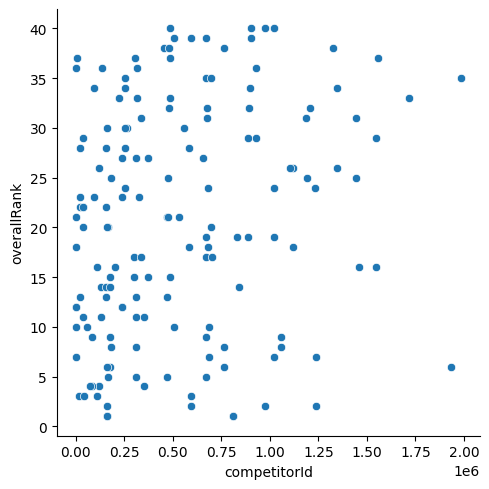

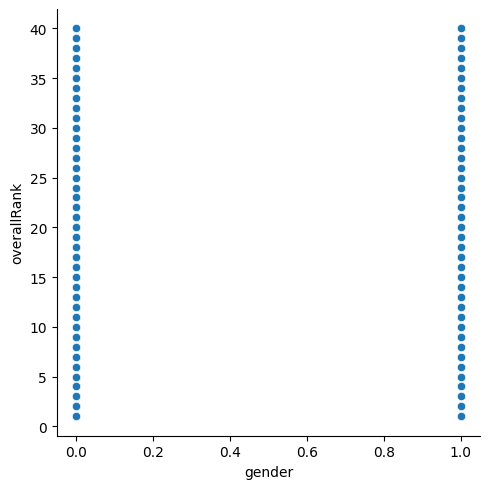

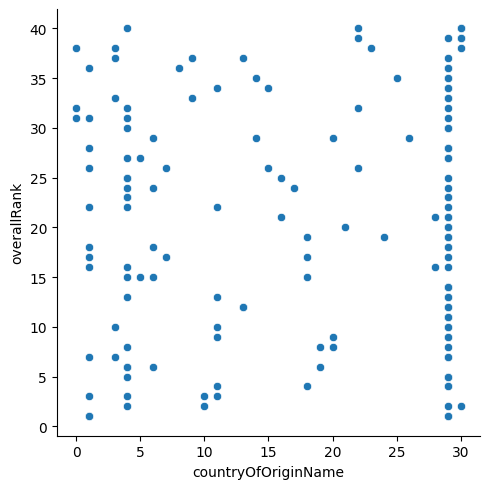

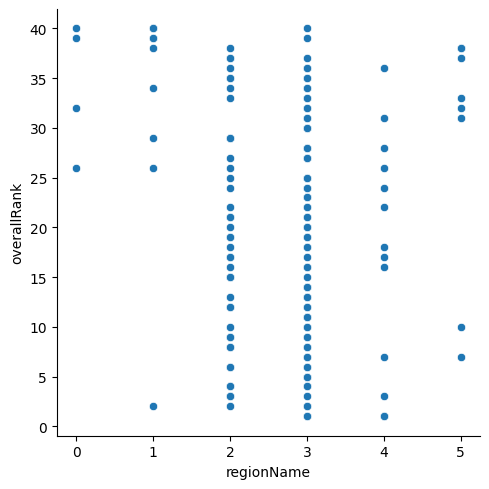

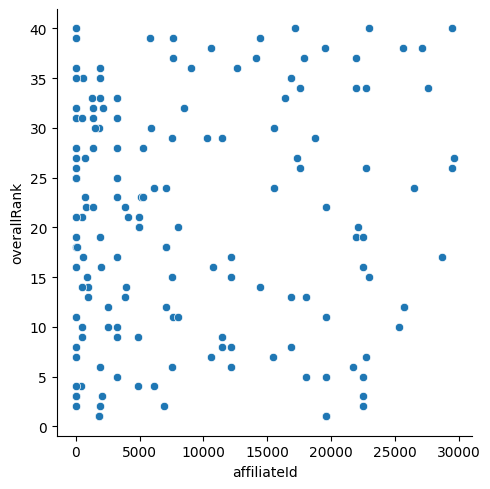

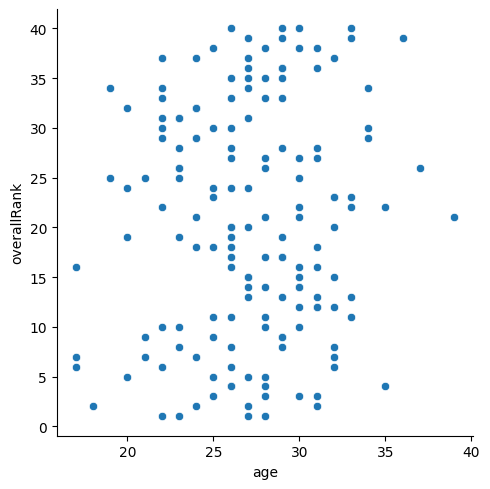

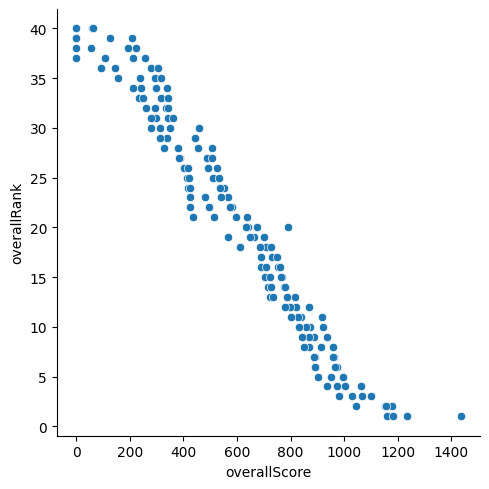

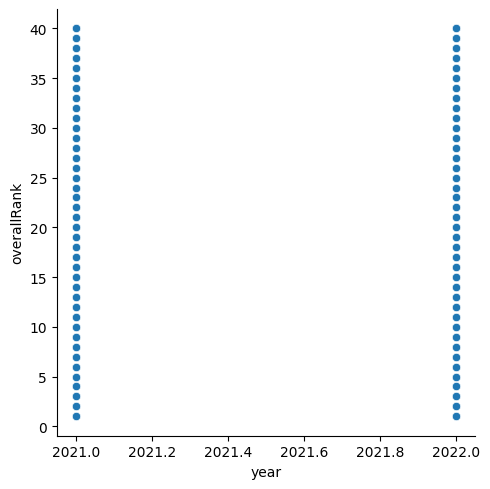

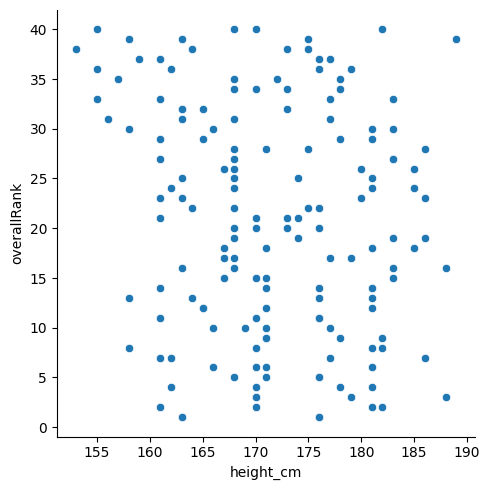

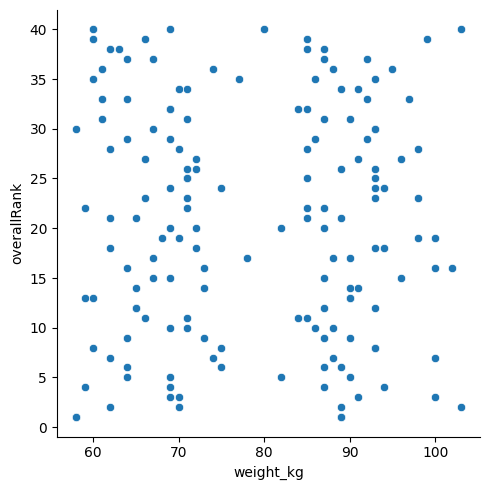

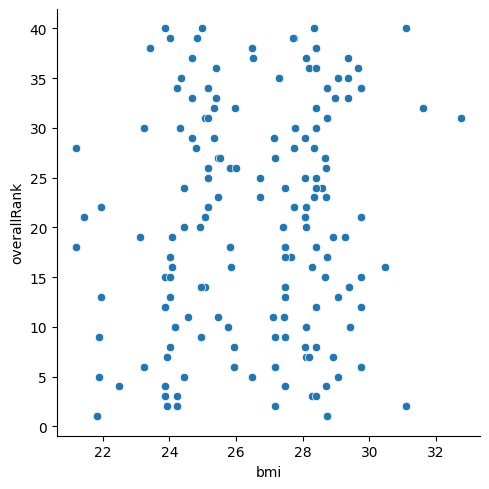

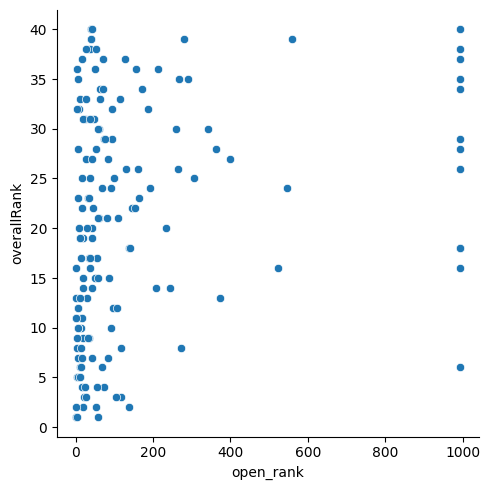

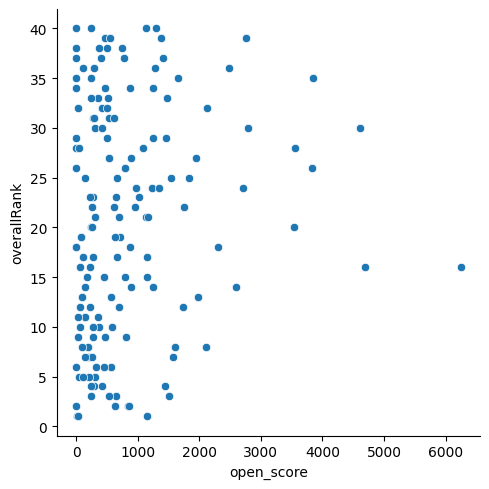

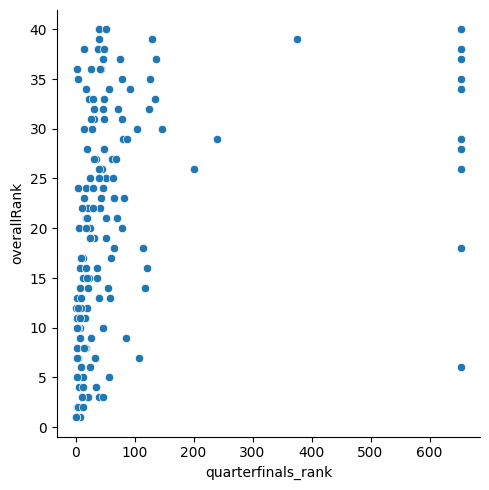

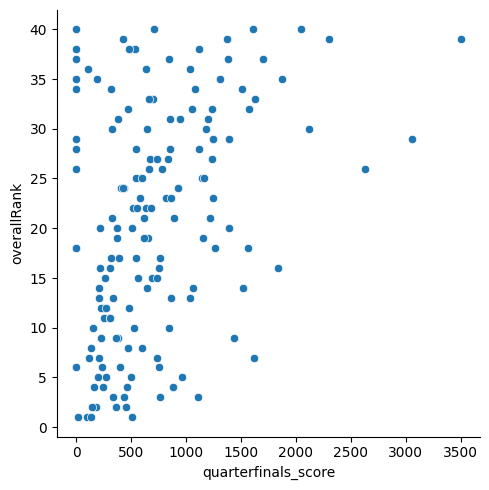

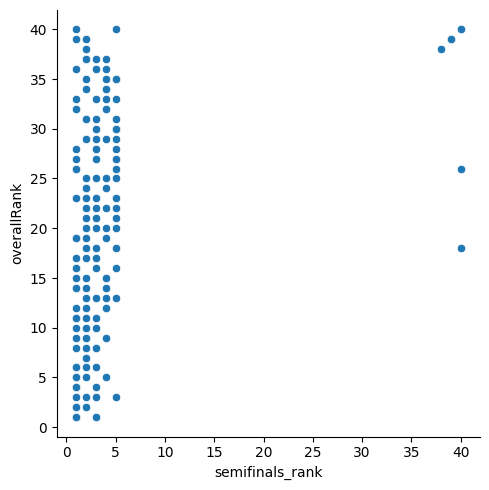

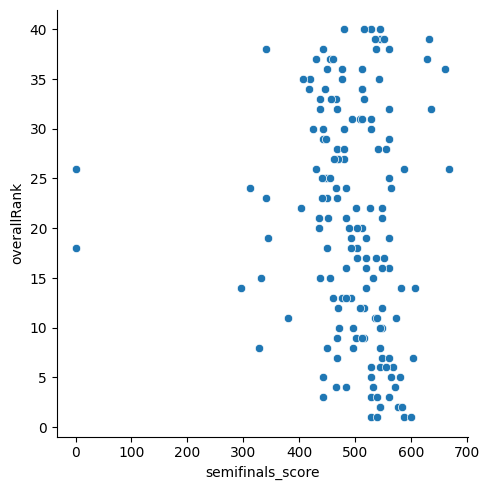

In [9]:
# Exclude the year 2023 records
data = pivot_data[pivot_data['year'] != 2023]

# Get the list of column names, excluding the 'overallRank' column
x_columns = [col for col in data.columns if col != 'overallRank']

# Create a plot for each column
for column in x_columns:
    sns.relplot(x=column, y='overallRank', data=data)

# Exports

In [10]:
pivot_data.to_csv('C:/Users/Zi/Documents/data-science-crossfit/csv_files/version_4_engineered_data/pivoted_athletes_information.csv', index=False)
